# TSNE Analysis

In [1]:
import sys
sys.path.append('C:/Users/nikol/Documents/GitHub/EnsembleTools')

In [2]:
from dpet.ensemble_analysis import EnsembleAnalysis
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "8"

## Download from Atlas and Load Data

In [3]:
ens_codes = [
    "3a1g_B"
]
data_dir = 'C:/Users/nikol/Documents/test_dir/atlas'

analysis = EnsembleAnalysis(ens_codes, data_dir)
analysis.download_from_database(database='atlas')

Download complete. Saved to: C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.zip
Downloaded file 3a1g_B.zip from Atlas.
Extracted directory C:\Users\nikol\Documents\test_dir\atlas.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_B_prod_R1_fit.top.pdb.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_B_prod_R2_fit.top.pdb.
Copied and renamed C:\Users\nikol\Documents\test_dir\atlas\3a1g_B.pdb to C:\Users\nikol\Documents\test_dir\atlas\3a1g_B_prod_R3_fit.top.pdb.
Analysing ensembles: ['3a1g_B_prod_R1_fit', '3a1g_B_prod_R2_fit', '3a1g_B_prod_R3_fit']


In [4]:
analysis.generate_trajectories()

Trajectory already exists for ensemble 3a1g_B_prod_R1_fit. Loading trajectory.
Trajectory already exists for ensemble 3a1g_B_prod_R2_fit. Loading trajectory.
Trajectory already exists for ensemble 3a1g_B_prod_R3_fit. Loading trajectory.


In [5]:
analysis.random_sample_trajectories(sample_size=200)

## Featurization

In [6]:
analysis.perform_feature_extraction(featurization='phi_psi')

Performing feature extraction for Ensemble: 3a1g_B_prod_R1_fit.
Transformed ensemble shape: (200, 78)
Performing feature extraction for Ensemble: 3a1g_B_prod_R2_fit.
Transformed ensemble shape: (200, 78)
Performing feature extraction for Ensemble: 3a1g_B_prod_R3_fit.
Transformed ensemble shape: (200, 78)
Feature names: ['GLY2-PHI', 'SER3-PHI', 'MET4-PHI', 'GLU5-PHI', 'ARG6-PHI', 'ILE7-PHI', 'LYS8-PHI', 'GLU9-PHI', 'LEU10-PHI', 'ARG11-PHI', 'ASN12-PHI', 'LEU13-PHI', 'MET14-PHI', 'SER15-PHI', 'GLN16-PHI', 'SER17-PHI', 'ARG18-PHI', 'THR19-PHI', 'ARG20-PHI', 'GLU21-PHI', 'ILE22-PHI', 'LEU23-PHI', 'THR24-PHI', 'LYS25-PHI', 'THR26-PHI', 'THR27-PHI', 'VAL28-PHI', 'ASP29-PHI', 'HIS30-PHI', 'MET31-PHI', 'ALA32-PHI', 'ILE33-PHI', 'ILE34-PHI', 'LYS35-PHI', 'LYS36-PHI', 'TYR37-PHI', 'THR38-PHI', 'SER39-PHI', 'GLY40-PHI', 'GLY1-PSI', 'GLY2-PSI', 'SER3-PSI', 'MET4-PSI', 'GLU5-PSI', 'ARG6-PSI', 'ILE7-PSI', 'LYS8-PSI', 'GLU9-PSI', 'LEU10-PSI', 'ARG11-PSI', 'ASN12-PSI', 'LEU13-PSI', 'MET14-PSI', 'SER15

## Dimensionality Reduction

In [7]:
analysis.fit_dimensionality_reduction(method='tsne', perplexity_vals = [10, 50, 90], circular=True, range_n_clusters=range(2,10,1))

tsne is running...


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

Best Perplexity: 10
Best Number of Clusters: 4


c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nikol\anaconda3\envs\tensorflowgpu\lib\site-packages\sklearn\cluster\_

## Analysis

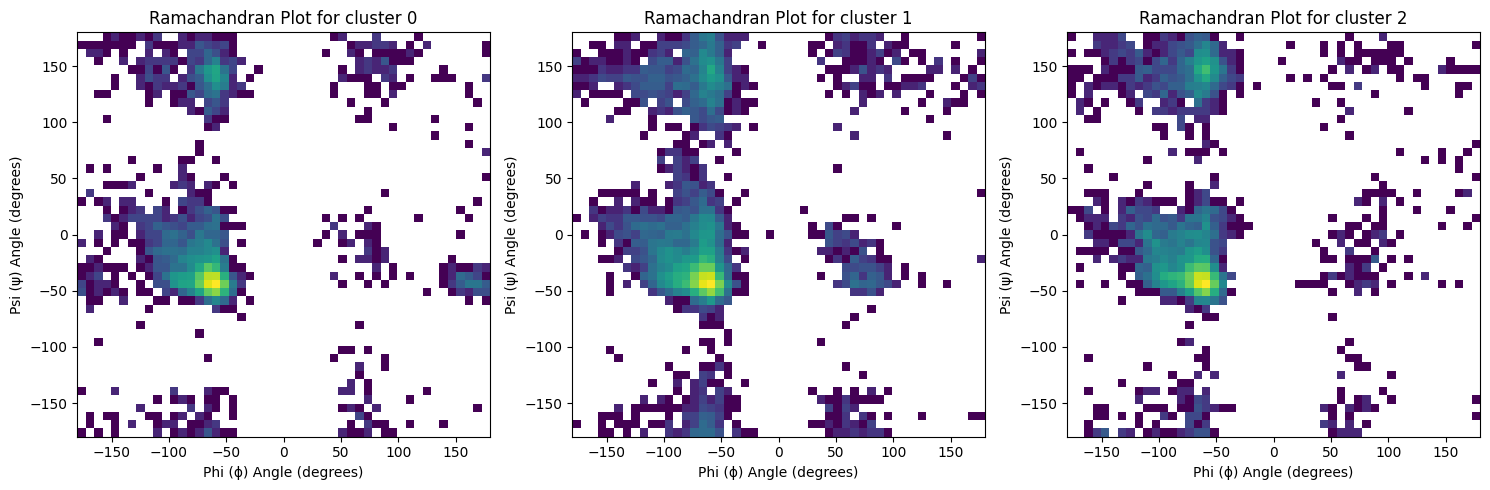

In [8]:
analysis.tsne_ramachandran_plot_density(save=True)

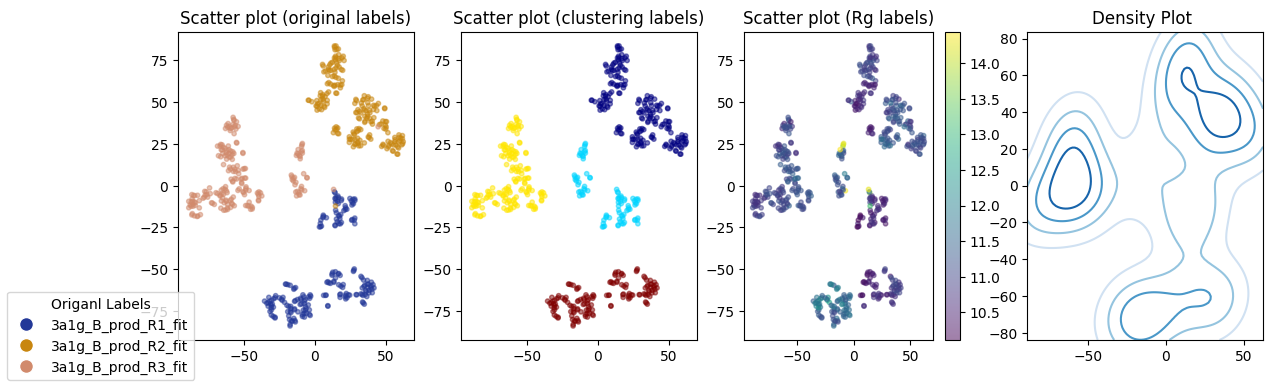

In [9]:
analysis.tsne_scatter_plot(save=True)

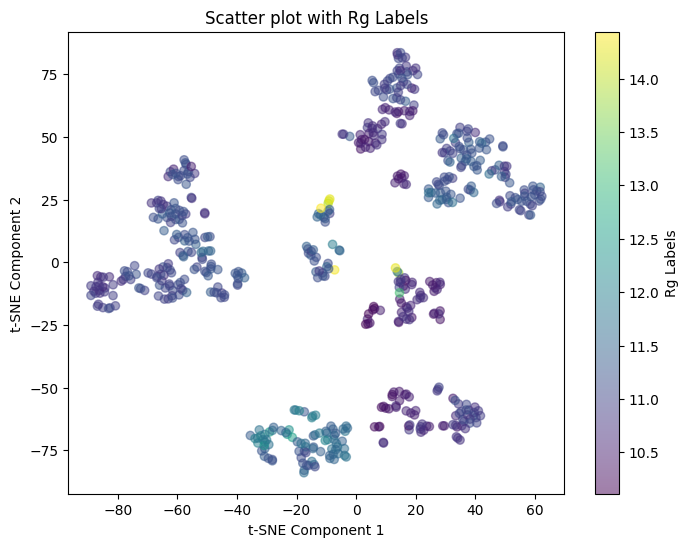

In [10]:
analysis.tsne_scatter_plot_rg(save=True)

In [12]:
analysis.generate_tsne_report()

Plots saved to C:\Users\nikol\Documents\test_dir\atlas\plots\tsne.pdf


In [13]:
analysis.generate_custom_report()

Plots saved to C:\Users\nikol\Documents\test_dir\atlas\plots\custom_report.pdf
